In [1]:
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})

# Modeling DCR dependence on diameter 1

In [5]:
jact = 1e-14
delta = 0.5

def current(D, k):
    return jact * math.pi / 4 * D ** 2 * (1 + 4 * k * delta / D)

In [17]:
palette = sns.color_palette()

In [19]:
palette[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

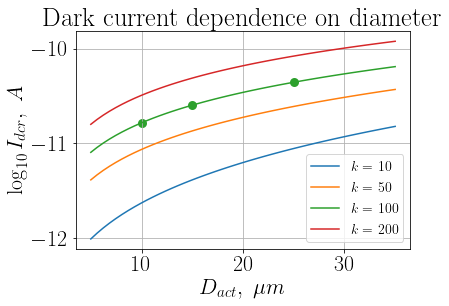

In [36]:
N = 1000
Dlist = np.linspace(5, 35)
k = [10, 50, 100, 200]

for ind, kloc in enumerate(k):
    plt.plot(Dlist, np.log10(current(Dlist, kloc)), label = r'$k = $ ' + str(kloc), color = palette[ind])
model_points = [[25, current(25, 100)], [15, current(15, 100)], [10, current(10, 100)]]
    
for ind, point in enumerate(model_points):
    plt.scatter(point[0], np.log10(point[1]), color = palette[2], linewidths= 3)
    
plt.legend(fontsize=14, loc='lower right')
plt.xlabel(r'$D_{act}, \ \mu m$')
plt.ylabel(r'$\log_{10} I_{dcr}, \ A$')
plt.title('Dark current dependence on diameter')
plt.grid(True)
#plt.savefig('dcr_diam_analyt.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

In [37]:
current(25, 100) / current(10, 100)

2.678571428571429

# Modeling breakdown voltage depenednce on diametr

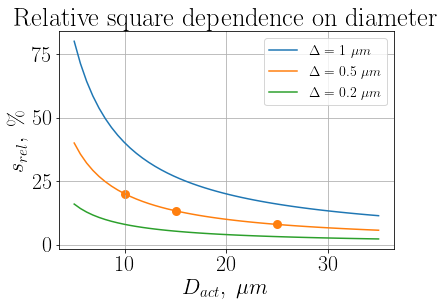

In [13]:
N = 1000
delta_list = [1, 0.5, 0.2]
diam_list = np.linspace(5, 35)
diam_used = [25, 15, 10]
palette = sns.color_palette()

def rel_squares(cur_delta):
    return 4 * cur_delta / diam_list

for ind, cur_delta in enumerate(delta_list):
    plt.plot(diam_list, 100 * rel_squares(cur_delta), label = r'$\Delta =$ ' + str(cur_delta) + r' $\mu m$', 
             color = palette[ind])

delta_used = 0.5
for ind, cur_diam in enumerate(diam_used):
    plt.scatter(cur_diam,  100 * 4 * delta_used / cur_diam, color = palette[1], 
               linewidth = 3)
    
plt.legend(fontsize=14, loc='upper right')
plt.xlabel(r'$D_{act}, \ \mu m$')
plt.ylabel(r'$s_{rel}, \ \%$')
plt.title('Relative square dependence on diameter')
plt.grid(True)
plt.savefig('dcr_square_analyt.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()